# <b><u> Project Title: Seoul Bike Sharing Demand Prediction </u></b>

###***Project By- Abhay Tevatia***

# ***Project Summary - ***

The Seoul Bike Sharing Demand Prediction project seeks to optimize bike availability, meet public demand for rental bikes, and enhance urban mobility infrastructure. The findings and models generated contribute to the city's goal of providing efficient and accessible bike rental services.
Enhance bike rental availability and urban mobility through predictive modeling.

**Project Phases**:
1. **Data Exploration**: Comprehensive dataset analysis, including weather information and rental counts.
2. **Data Preprocessing**: Handling missing values and encoding categorical variables.
3. **Data Visualization**: Creating informative visuals to uncover rental patterns.
4. **Modeling**: Using various regression models for rental count prediction.
5. **Feature Importance**: Identifying factors influencing demand.
6. **Summary**: Providing key findings and insights.

# **GitHub Link -**

https://github.com/abhaytevatia/seoul_bike

## **Problem Statement**

The primary goal of this project is to develop a predictive model that estimates the demand for rental bikes at various hours throughout the day. This model's purpose is to ensure a consistent and adequate supply of rental bikes to cater to the public's mobility needs. The prediction generated by the model will assist city authorities and bike-sharing services in making data-driven decisions about bike allocation, maintenance, and service enhancements.

In summary, this project revolves around creating a predictive model to forecast the required bike count for each hour, ultimately contributing to a more efficient and accessible rental bike service for urban residents.


![Image Alt Text](https://drive.google.com/uc?id=1nb-GRPxpebnuXdVPUYIUx4PdwGS35S8c)

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour, and date information.</b>

### <b>Attribute Information: </b>

* **Date**: year-month-day
* **Rented Bike Count**: Count of bikes rented at each hour
* **Hour**: Hour of the day
* **Temperature**: Temperature in Celsius
* **Humidity**: Relative humidity (%)
* **Windspeed**: Wind speed in meters per second (m/s)
* **Visibility**: Visibility in 10 meters (10m)
* **Dew Point Temperature**: Dew point temperature in Celsius
* **Solar Radiation**: Solar radiation in MegaJoules per square meter (MJ/m²)
* **Rainfall**: Rainfall in millimeters (mm)
* **Snowfall**: Snowfall in centimeters (cm)
* **Seasons**: Winter, Spring, Summer, Autumn
* **Holiday**: Holiday/No holiday
* **Functional Day**: NoFunc(Non-Functional Hours), Fun(Functional hours)


**Importing Libraries**

In [106]:
# Import necessary libraries
import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import Pandas for data manipulation
import seaborn as sns  # Import Seaborn for data visualization
import warnings  # Import warnings to suppress warnings
warnings.filterwarnings('ignore')  # Suppress warnings to improve code output
import matplotlib.pyplot as plt  # Import Matplotlib for basic data visualization
%matplotlib inline
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder for label encoding
sns.set_style('darkgrid')  # Set Seaborn style for plots

## **Introduction to data**

In [107]:
# Mounting Google Drive
from google.colab import drive  # Import the 'drive' module from Google Colab to mount Google Drive
drive.mount('/content/drive/')  # Mount Google Drive to the '/content/drive/' directory


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [108]:
# Load the dataset from a CSV file, specifying the encoding to handle non-UTF-8 characters
seoul_bike_df = pd.read_csv('/content/drive/My Drive/seoul_bike.csv', encoding='ISO-8859-1')

In [109]:
# Display the first few rows of the DataFrame 'df' to inspect the data
seoul_bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [110]:
# Display the last few rows of the DataFrame 'df' to inspect the data
seoul_bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [111]:
# Renaming columns for clarity and consistency in the 'seoul_bike_df' DataFrame
seoul_bike_df.rename(columns={"Temperature(°C)": "Temperature",
                             "Functioning Day": "Functioning_Day",
                             "Humidity(%)": "Humidity",
                             "Wind speed (m/s)": "Wind_speed",
                             "Visibility (10m)": "Visibility",
                             "Dew point temperature(°C)": "Dew_point_temperature",
                             "Solar Radiation (MJ/m2)": "Solar_Radiation",
                             "Snowfall (cm)": "Snowfall",
                             "Rainfall(mm)": "Rainfall",
                             "Rented Bike Count": "Rented_Bike_Count"}, inplace=True)

**Shape**

In [112]:
# Display the shape of the 'seoul_bike_df' DataFrame
seoul_bike_df.shape

(8760, 14)

**Info**

In [113]:
# Display information about the 'seoul_bike_df' DataFrame
seoul_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [114]:
# Check for duplicate values in the 'seoul_bike_df' DataFrame
duplicate_count = seoul_bike_df.duplicated().sum()

**Missingno library offers a very nice way to visualize the distribution of NaN values.**

<Axes: >

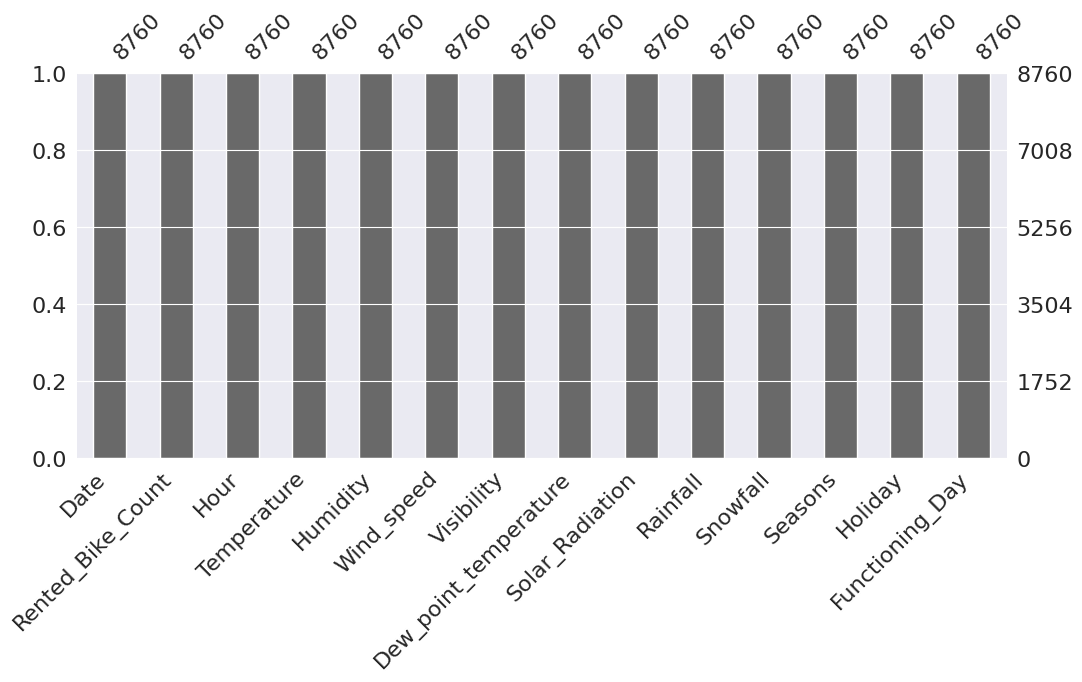

In [115]:
# Import the 'missingno' library for missing data visualization
import missingno as msno

# Create a bar chart to visualize missing data in 'seoul_bike_df'
msno.bar(seoul_bike_df, figsize=(12, 5))

# You can also use a matrix plot to visualize missing data by uncommenting the next line
# msno.matrix(seoul_bike_df, figsize=(12, 5))


In [116]:
# Count the number of null (missing) values across the columns in 'seoul_bike_df'
seoul_bike_df.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

In [117]:
# Display the column names of the 'seoul_bike_df' DataFrame
seoul_bike_df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [118]:
# Display unique values in the 'Seasons' column of the 'seoul_bike_df' DataFrame
seoul_bike_df.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [119]:
# Display unique values in the 'Holiday' column of the 'seoul_bike_df' DataFrame
seoul_bike_df.Holiday.unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [120]:
# Display unique values in the 'Hour' column of the 'seoul_bike_df' DataFrame
seoul_bike_df.Hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

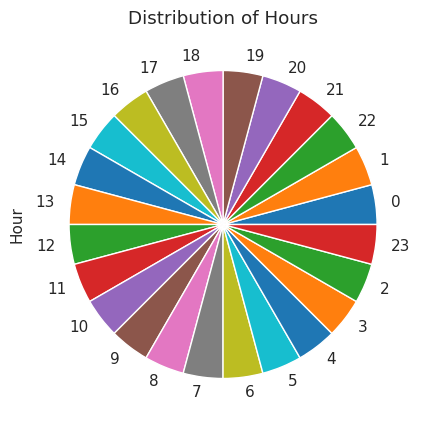

In [121]:
# Set the title for the plot
plt.title("Distribution of Hours")

# Create a pie chart to visualize the distribution of hours in the 'Hour' column
seoul_bike_df['Hour'].value_counts().plot(kind='pie', figsize=(8, 5))

# Display the pie chart
plt.show()

In [122]:
# Check unique values in the 'Functioning_Day' column
seoul_bike_df.Functioning_Day.unique()

array(['Yes', 'No'], dtype=object)

In [123]:
# Grouping the dataset by 'Functioning_Day' and calculating the sum of 'Rented_Bike_Count'
functioning_day_counts = seoul_bike_df.groupby('Functioning_Day')['Rented_Bike_Count'].sum().reset_index()
functioning_day_counts

,Functioning_Day,Rented_Bike_Count
0,No,0
1,Yes,6172314


In [124]:
# Filtering the dataset to keep only rows where 'Functioning_Day' is 'Yes'
seoul_bike_df = seoul_bike_df[seoul_bike_df['Functioning_Day'] == 'Yes']

# Dropping the 'Functioning_Day' column as it's no longer needed
seoul_bike_df.drop('Functioning_Day', axis=1, inplace=True)

In [125]:
# Displaying the shape of the filtered dataset
seoul_bike_df.shape

(8465, 13)

## **Dependent variable**

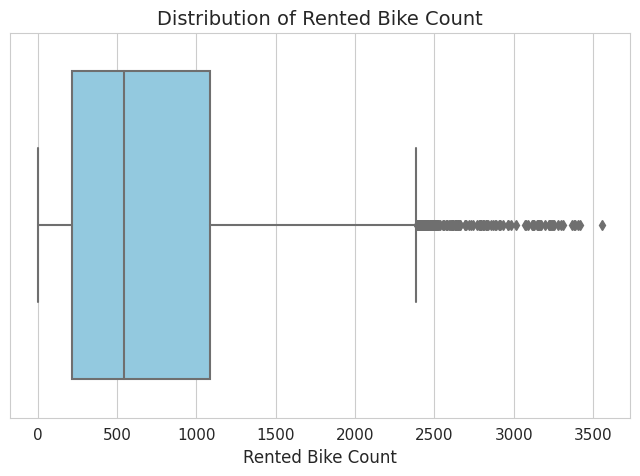

In [126]:
# Create a stylish box plot
plt.figure(figsize=(8, 5))  # Set the figure size
sns.set_style("whitegrid")  # Set the style
sns.boxplot(x=seoul_bike_df['Rented_Bike_Count'], color='skyblue', orient='h')  # Customize the box plot
plt.xlabel('Rented Bike Count', fontsize=12)  # Label for the x-axis
plt.title('Distribution of Rented Bike Count', fontsize=14)  # Title for the plot
plt.show()  # Display the plot

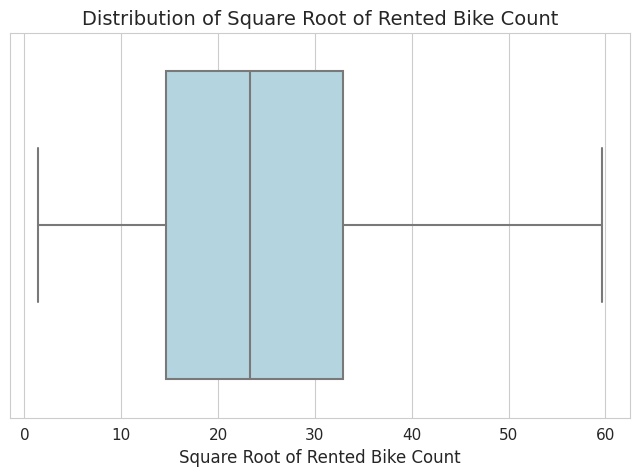

In [127]:
# Create a stylish box plot for the square root of 'Rented_Bike_Count'
plt.figure(figsize=(8, 5))  # Set the figure size
sns.set_style("whitegrid")  # Set the style
sns.boxplot(x=np.sqrt(seoul_bike_df['Rented_Bike_Count']), color='lightblue', orient='h')  # Customize the box plot
plt.xlabel('Square Root of Rented Bike Count', fontsize=12)  # Label for the x-axis
plt.title('Distribution of Square Root of Rented Bike Count', fontsize=14)  # Title for the plot
plt.show()  # Display the plot

**Observations:**

Upon applying the square root transformation to the 'Rented Bike Count' column, it was observed that no outliers are present.


## **Catagorical Variables**

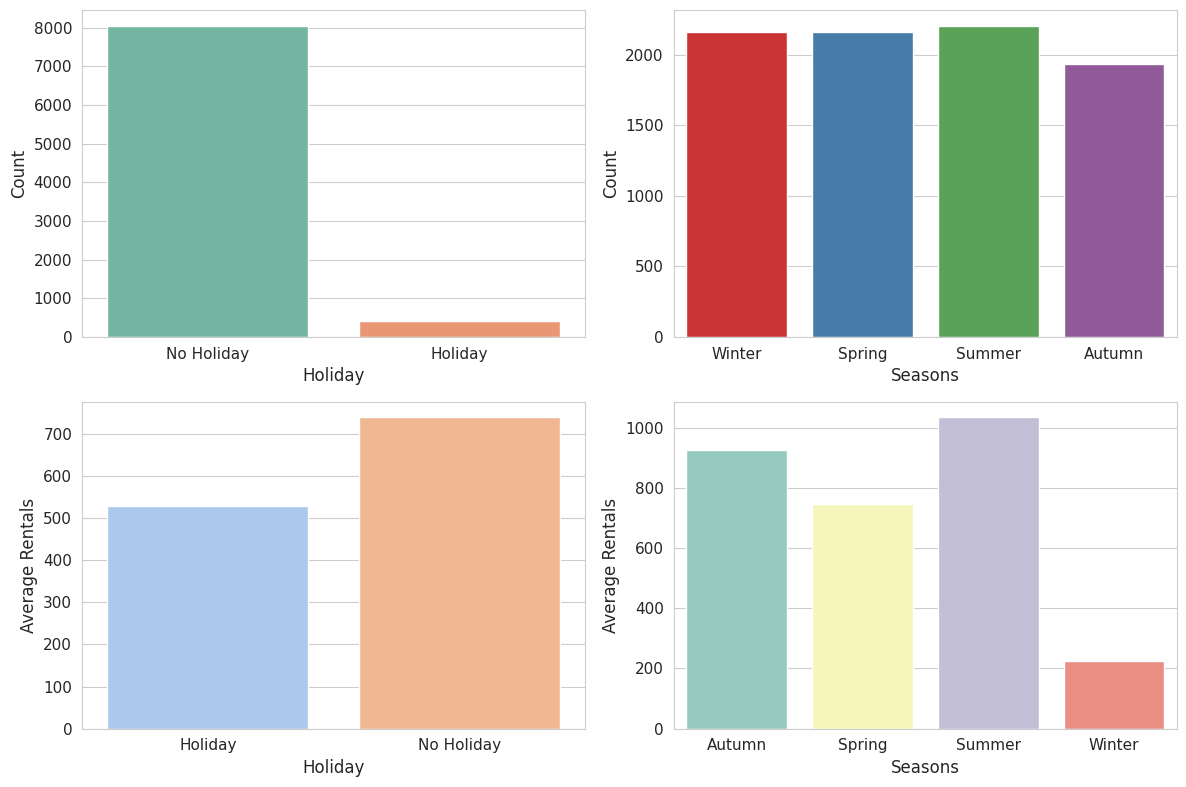

In [128]:
# Create a 2x2 subplots with custom style and colors
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
sns.set_style("whitegrid")  # Set the style

# Plot 1: Count of rentals on holidays
ax1 = plt.subplot(2, 2, 1)
sns.countplot(data=seoul_bike_df, x='Holiday', palette="Set2")
ax1.set_xlabel('Holiday', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)

# Plot 2: Count of rentals in different seasons
ax1 = plt.subplot(2, 2, 2)
sns.countplot(data=seoul_bike_df, x='Seasons', palette="Set1")
ax1.set_xlabel('Seasons', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)

# Plot 3: Average bike rentals on holidays
holiday_df = seoul_bike_df.groupby('Holiday')['Rented_Bike_Count'].mean().reset_index()
ax1 = plt.subplot(2, 2, 3)
sns.barplot(data=holiday_df, x='Holiday', y='Rented_Bike_Count', palette="pastel")
ax1.set_xlabel('Holiday', fontsize=12)
ax1.set_ylabel('Average Rentals', fontsize=12)

# Plot 4: Average bike rentals in different seasons
seasons_df = seoul_bike_df.groupby('Seasons')['Rented_Bike_Count'].mean().reset_index()
ax1 = plt.subplot(2, 2, 4)
sns.barplot(data=seasons_df, x='Seasons', y='Rented_Bike_Count', palette="Set3")
ax1.set_xlabel('Seasons', fontsize=12)
ax1.set_ylabel('Average Rentals', fontsize=12)

plt.tight_layout()  # Ensure subplots are properly spaced
plt.show()

**Observations:**<br>
Upon analyzing the dataset, several notable patterns emerge. Bike rentals are more frequent on working days (non-holidays) and during the summer season. Interestingly, even on working days, the demand for bike rentals remains consistently high across all seasons.

**Label Encoding**

In [129]:
# List of categorical variables in the dataset
categorical_variables = ['Holiday', 'Seasons']

In [130]:
# Create a LabelEncoder to encode categorical variables
encode = LabelEncoder()

# Apply the encoding to the specified categorical columns in the DataFrame
seoul_bike_df[categorical_variables] = seoul_bike_df[categorical_variables].apply(lambda X: encode.fit_transform(X))

In [131]:
# Display the first 2 rows of the DataFrame for a quick overview
seoul_bike_df.head(2)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1


## **Numerical Variables**

In [132]:
# Display the column names of the DataFrame
seoul_bike_df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday'],
      dtype='object')

In [133]:
# List of numerical features in the dataset
numerical_features = ['Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility',
                      'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall']

In [134]:
# Creating a color map to associate colors with numerical features
# Using a color palette to generate a list of RGB values
rgb_values = sns.color_palette('Set1', 9)

# Creating a dictionary that maps numerical feature names to corresponding RGB values
color_map = dict(zip(numerical_features, rgb_values))

In [135]:
# List of RGB values for color mapping
rgb_values


[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [136]:
# Get unique values in the 'Hour' column of the seoul_bike_df DataFrame
unique_hours = seoul_bike_df['Hour'].unique()
unique_hours

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

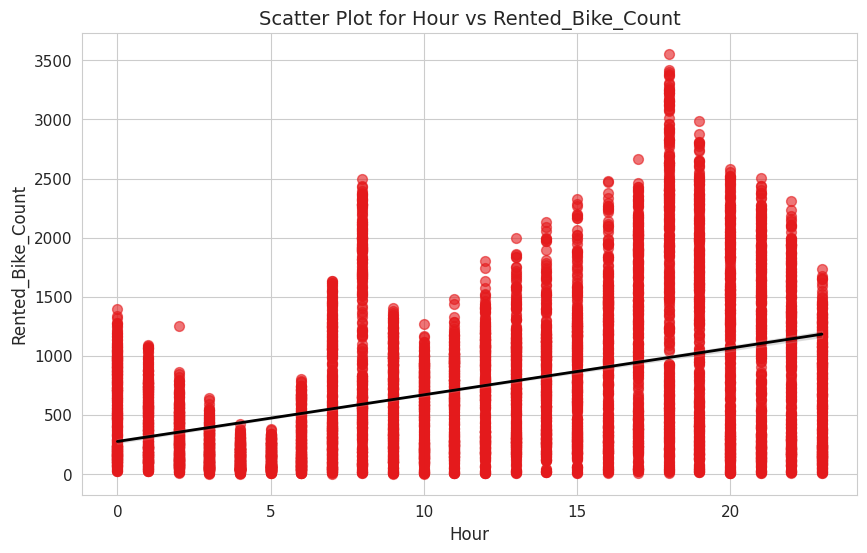

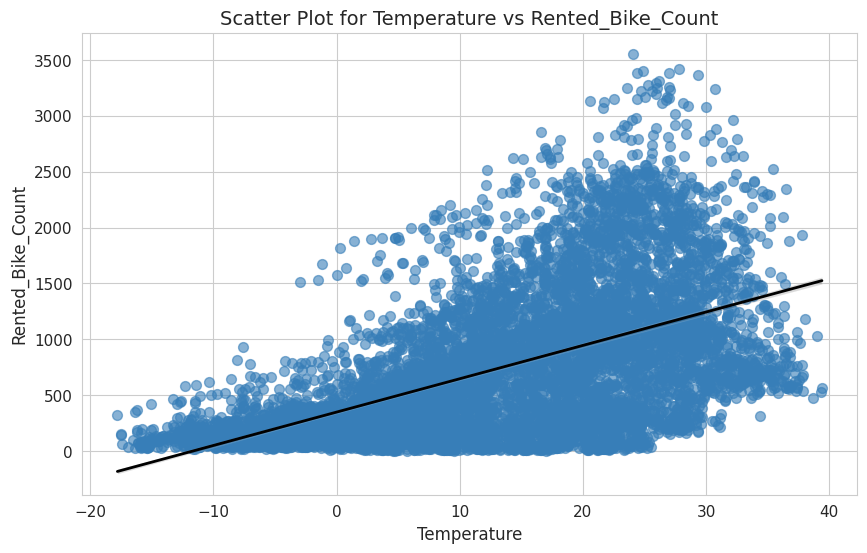

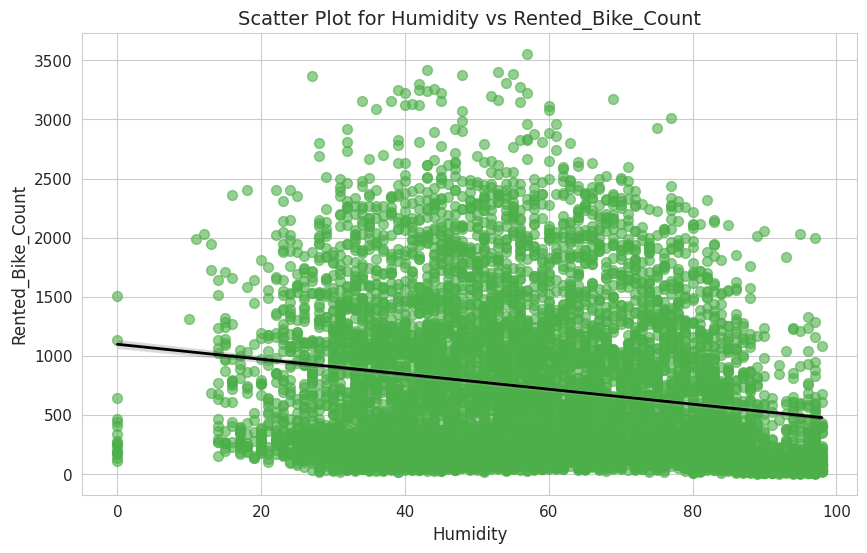

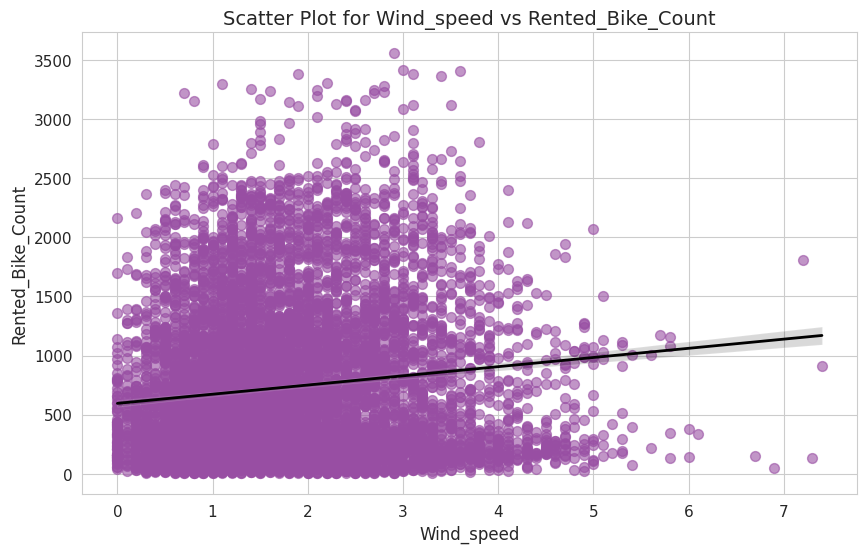

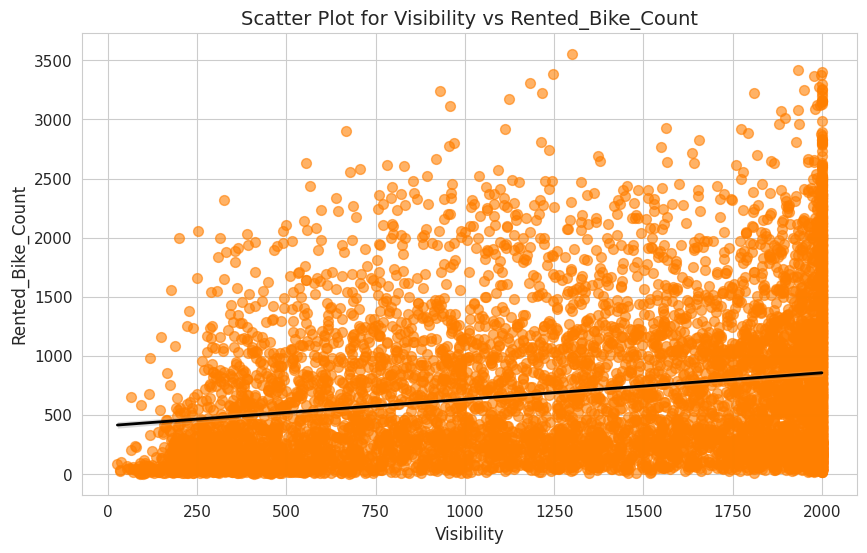

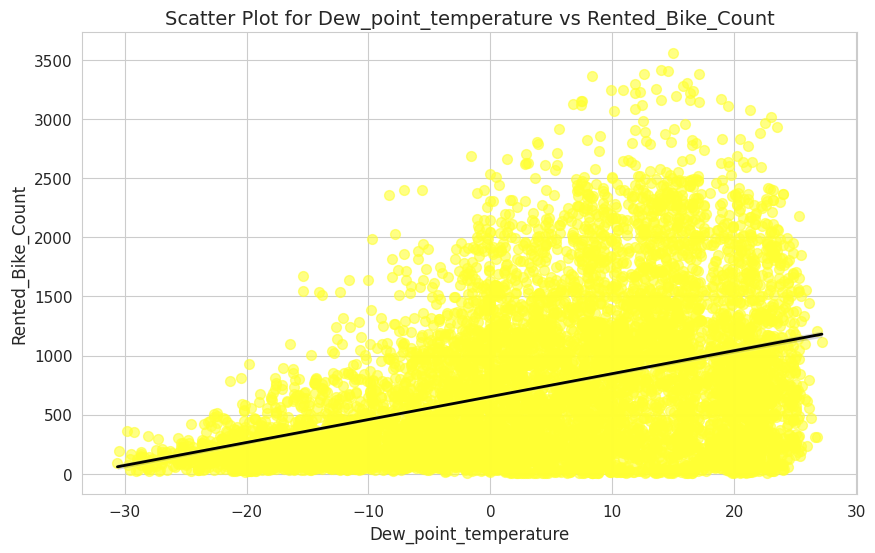

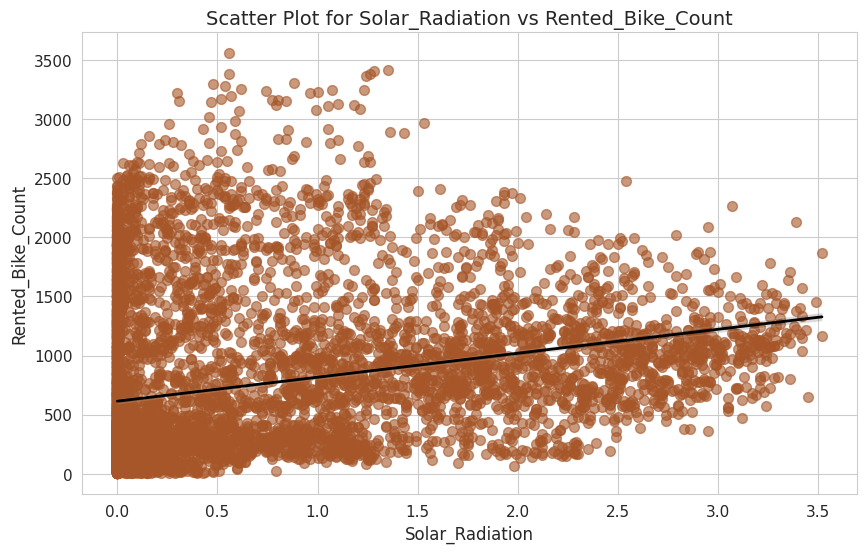

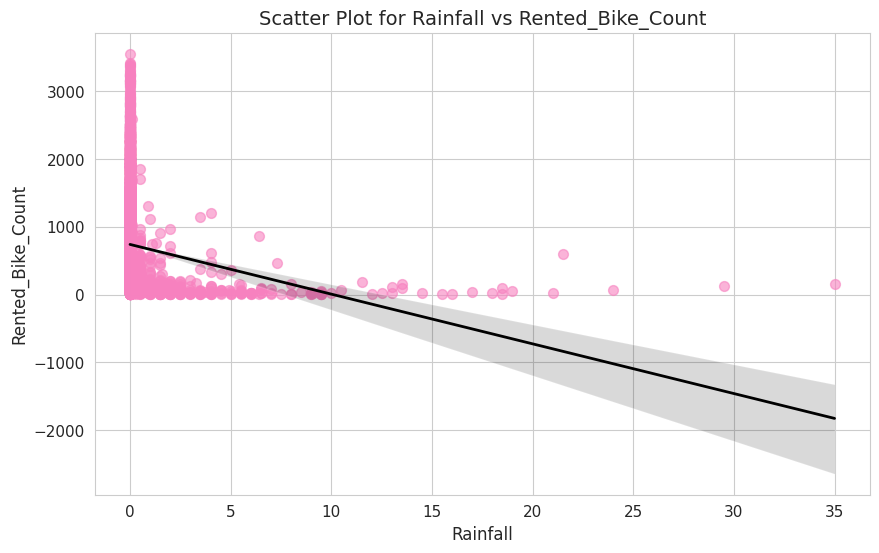

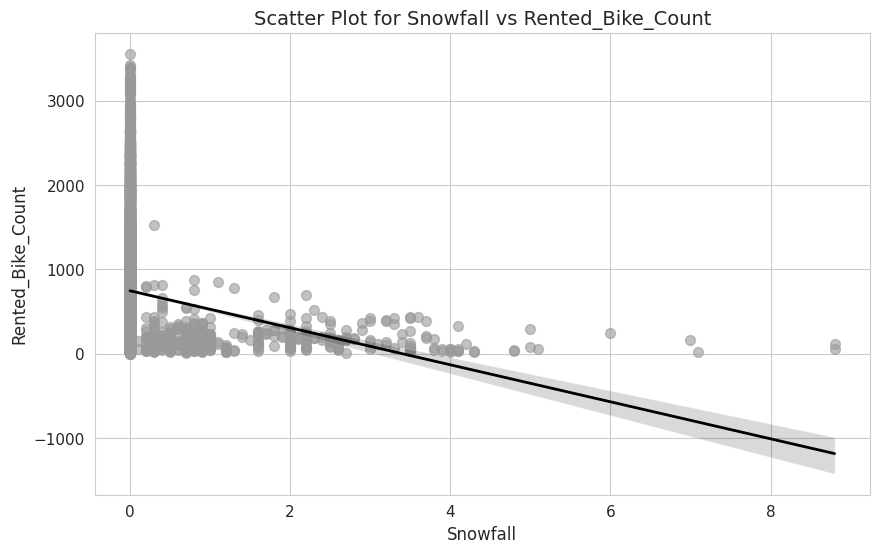

In [137]:
# Set the default figure size for the plots and set the style
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style("whitegrid")

# Iterate through numerical features and color map to create scatter plots
for key, value in zip(numerical_features, color_map):
    plt.figure()  # Create a new figure for each plot
    # Create a scatter plot with 'Rented_Bike_Count' on the y-axis and customize the scatter and line colors
    sns.regplot(x=seoul_bike_df[key], y=seoul_bike_df['Rented_Bike_Count'],
                scatter_kws={"color": color_map[value], "alpha": 0.6, "s": 50},
                line_kws={"color": "black", "linewidth": 2})
    # Set plot title, x-axis label, and y-axis label
    plt.title(f'Scatter Plot for {key} vs Rented_Bike_Count', fontsize=14)
    plt.xlabel(key, fontsize=12)
    plt.ylabel('Rented_Bike_Count', fontsize=12)

# Display the plots
plt.show()

**Key Observations:**

1. **Hour:** The demand for bikes is highest during the office hours, typically around 8 A.M. and 8 P.M. However, there are distinct trends during early mornings and late evenings.

2. **Temperature:** There is a positive correlation between temperature and bike count. As the temperature increases, so does the demand for bikes.

3. **Humidity:** Higher humidity levels deter bike rides, leading to a decrease in bike count.

4. **Wind Speed:** While there is a slight increase in bike count with higher wind speed, the effect is relatively small.

5. **Visibility:** Increased visibility corresponds with higher bike counts, as low visibility discourages biking.

6. **Rainfall and Snowfall:** Inclement weather conditions such as rainfall and snowfall lead to a decrease in bike counts, as people tend to avoid biking in unfavorable conditions.


## **Change in Bike Renting with Change in hours**

In [138]:
# Convert the 'Date' column to datetime format
seoul_bike_df['Date'] = pd.to_datetime(seoul_bike_df['Date'])

In [139]:
# Extract a DataFrame containing only the 'Date' and 'Rented_Bike_Count' columns
bike_renting_change = seoul_bike_df[['Date', 'Rented_Bike_Count']]

In [140]:
# Extract year and month from the 'Date' column and add them as new columns 'year' and 'month'
bike_renting_change['year'] = bike_renting_change['Date'].dt.year
bike_renting_change['month'] = bike_renting_change['Date'].dt.month

<Axes: xlabel='month', ylabel='Rented_Bike_Count'>

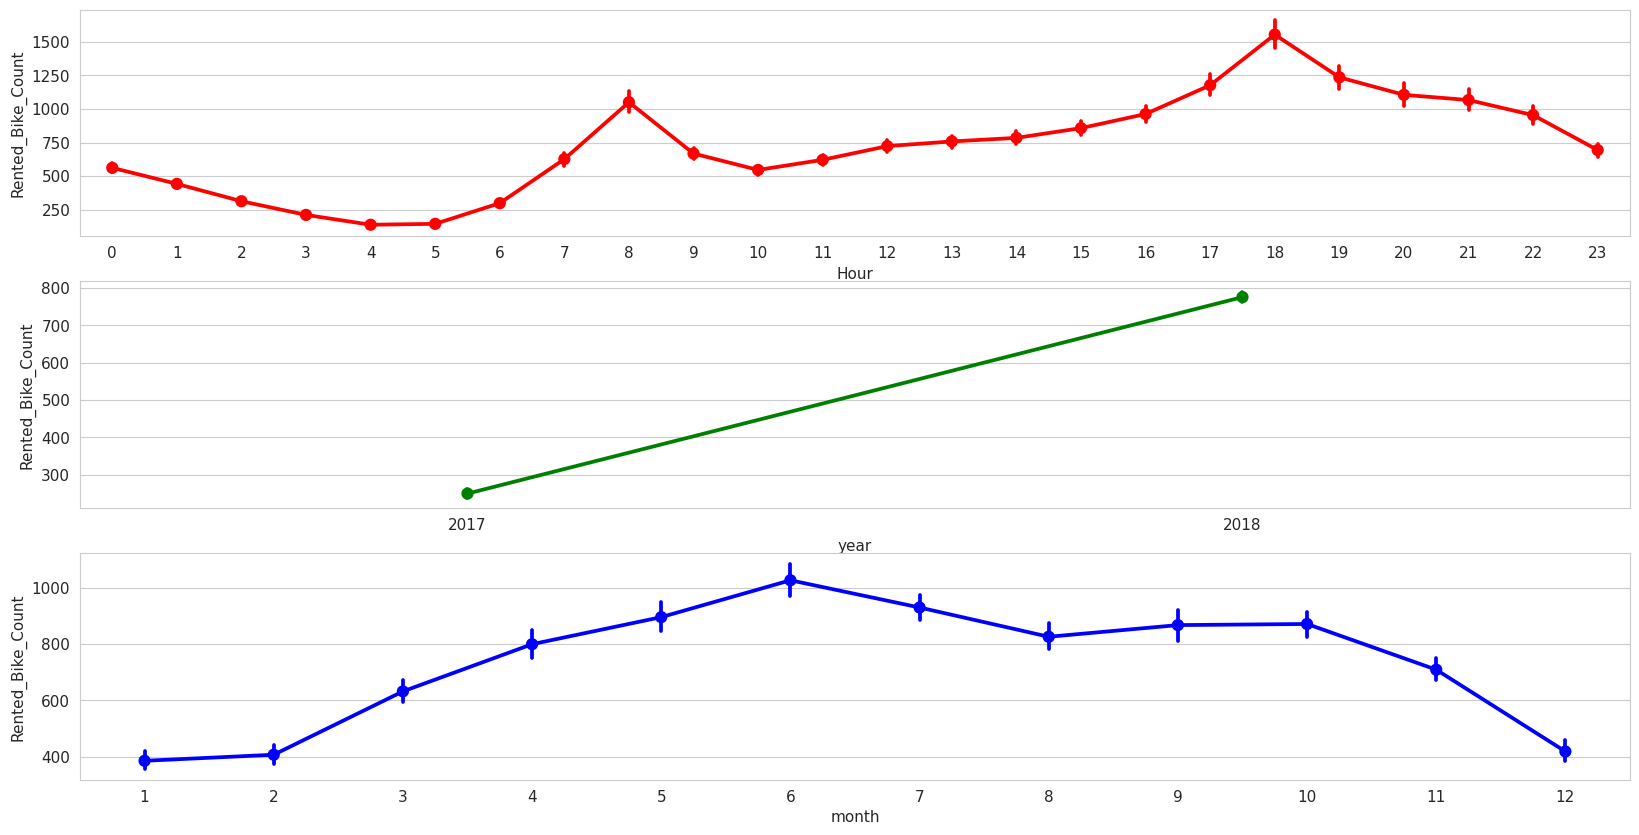

In [141]:
# Increase the font size
plt.rc('font', size=11)

# Create a 3x1 subplot
figure, axes = plt.subplots(nrows=3, figsize=(20, 10))

# Plot a pointplot for hourly bike rentals
sns.pointplot(data=seoul_bike_df, x='Hour', y='Rented_Bike_Count', color="r", ax=axes[0])

# Plot a pointplot for yearly bike rentals
sns.pointplot(x=bike_renting_change['year'], y=bike_renting_change['Rented_Bike_Count'], color="g", ax=axes[1])

# Plot a pointplot for monthly bike rentals
sns.pointplot(x=bike_renting_change['month'], y=bike_renting_change['Rented_Bike_Count'], color="b", ax=axes[2])

**Key Observations:**

1. There is a notable demand for bike rentals during typical office hours, around 8 A.M. and 6 P.M. However, there are distinct trends during early mornings and late evenings.

2. When comparing the data from 2017 and 2018, we observe an increase in the count of bike rentals in 2018.

3. The demand for bike rentals is expected to be high in the month of **June** and relatively lower in **December**.


## **Correlation**

<Axes: >

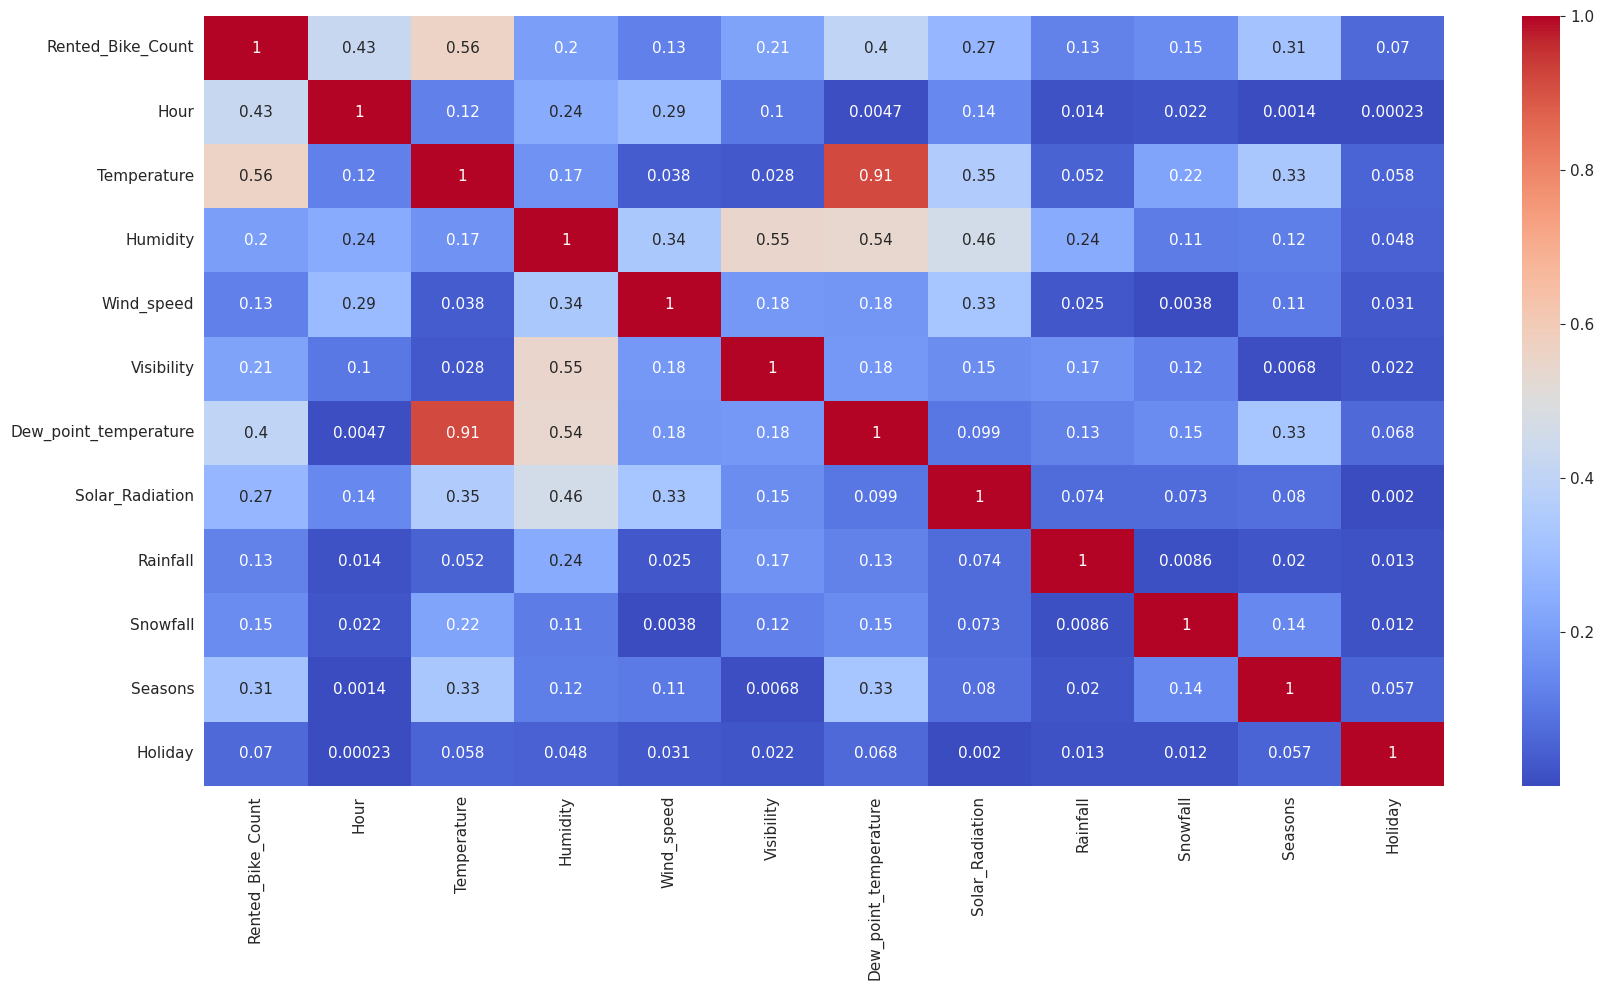

In [142]:
# Create a beautiful heatmap to visualize the absolute correlation between features
plt.figure(figsize=(20, 10))
sns.heatmap(seoul_bike_df.corr().abs(), annot=True, cmap='coolwarm')
# Adding annotations and using the 'coolwarm' color map for better visualization enhances the beauty and informativeness of the chart.

***Dew point is highly corelated with Temperature, dropping Dew point***

**Multicollinearity**


*   VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.
                      

* VIF score of an independent variable represents how well the variable is explained by other independent variables.

* **VIF** = **$1/1-R^2$**




In [143]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate the Variance Inflation Factor (VIF) for each feature
def calc_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif

In [144]:
# Calculate the Variance Inflation Factor (VIF) for all features except 'Date' and 'Rented_Bike_Count'
vif_results = calc_vif(seoul_bike_df.drop(columns=['Date', 'Rented_Bike_Count']))

In [145]:
# Calculate the Variance Inflation Factor (VIF) for all features except 'Date', 'Rented_Bike_Count', and 'Dew_point_temperature'
vif_results = calc_vif(seoul_bike_df.drop(columns=['Date', 'Rented_Bike_Count', 'Dew_point_temperature']))
vif_results

,variables,VIF
0,Hour,4.102488
1,Temperature,3.500001
2,Humidity,10.322545
3,Wind_speed,4.733598
4,Visibility,6.301679
5,Solar_Radiation,2.378604
6,Rainfall,1.082832
7,Snowfall,1.128496
8,Seasons,3.168925
9,Holiday,15.616871


## **Train Test Split**

In [146]:
# Independent variables (features)
X = seoul_bike_df.drop(columns=['Date', 'Rented_Bike_Count', 'Dew_point_temperature'])

# Dependent variable (target)
Y = np.sqrt(seoul_bike_df['Rented_Bike_Count'])

In [147]:
# Importing the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

In [148]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [149]:
# Print the shapes of the training and testing sets for independent and dependent variables
print("Training set shapes:")
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

print("\nTesting set shapes:")
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


Training set shapes:
X_train shape: (6772, 10)
Y_train shape: (6772,)

Testing set shapes:
X_test shape: (1693, 10)
Y_test shape: (1693,)


In [150]:
# Scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test = scaler.transform(X_test)

## **Evaluation Metrics**

In [151]:
# Import necessary metrics from scikit-learn
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [152]:
# Define a function for model evaluation using different metrics
def evaluation(Y, y):
    # Calculate Mean Absolute Error (MAE)
    MAE = mean_absolute_error(Y, y)

    # Calculate Mean Squared Error (MSE)
    MSE = mean_squared_error(Y, y)

    # Calculate Root Mean Squared Error (RMSE)
    RMSE = np.sqrt(MSE)

    # Calculate R-squared (R2) score
    r2 = r2_score(Y, y)

    # Calculate Adjusted R-squared (Adjusted R2)
    Adjusted_R2 = 1 - (1 - r2_score(Y, y)) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

    return MAE, MSE, RMSE, r2, Adjusted_R2

## **Linear Regression**

In [153]:
# Import Linear Regression model from scikit-learn
from sklearn.linear_model import LinearRegression

# Import Lasso regression model from scikit-learn
from sklearn.linear_model import Lasso

# Import Ridge regression model from scikit-learn
from sklearn.linear_model import Ridge

In [154]:
# Create a Linear Regression model
regressor = LinearRegression()

# Fit the model to the training data
regressor.fit(X_train, Y_train)

LinearRegression()

In [155]:
regressor.intercept_

24.360442986798848

In [156]:
regressor.coef_

array([ 3.55620574,  6.86136065, -3.26818797,  0.06969275,  0.15460247,
       -0.86818882, -1.85608614,  0.11654824, -2.31460477,  0.61188721])

In [157]:
regressor.score(X_train,Y_train)

0.6166007399042321

In [158]:
# Make predictions on the training data
y_train_pred = regressor.predict(X_train)

# Make predictions on the test data
y_test_pred = regressor.predict(X_test)

**Training Set**

In [159]:
evaluation_score = evaluation(Y_train,y_train_pred)

In [160]:
# Print the evaluation scores for the training data
print(f'MAE: {evaluation_score[0]}\nMSE: {evaluation_score[1]}\nRMSE: {evaluation_score[2]}\nR2: {evaluation_score[3]}\nAdjusted_R2: {evaluation_score[4]}')

MAE: 5.633537720510058
MSE: 54.13776638400084
RMSE: 7.357837072401158
R2: 0.6166007399042321
Adjusted_R2: 0.6143213150522954


In [161]:
# Create a dictionary to store evaluation metrics
dict_1 = {
    'Model': 'Linear regression',
    'MAE': round(evaluation_score[0], 3),
    'MSE': round(evaluation_score[1], 3),
    'RMSE': round(evaluation_score[2], 3),
    'R2_score': round(evaluation_score[3], 3),
    'Adjusted R2': round(evaluation_score[4], 2)
}

# Create a DataFrame using the dictionary
training_df = pd.DataFrame(dict_1, index=[1])

**Testing Set**

In [162]:
# Calculate evaluation metrics for the test data
evaluation_score = evaluation(Y_test, y_test_pred)

In [163]:
# Print the evaluation metrics for the test data
print(f'MAE: {evaluation_score[0]}\nMSE: {evaluation_score[1]}\nRMSE: {evaluation_score[2]}\nR2: {evaluation_score[3]}\nAdjusted_R2 : {evaluation_score[4]}')

MAE: 5.665127999984493
MSE: 55.28478755645324
RMSE: 7.43537406970579
R2: 0.599197751072102
Adjusted_R2 : 0.59681486017479


In [164]:
# Store the evaluation metrics for the test data in a DataFrame
dict_2 = {'Model':'Linear regression ',
       'MAE':round((evaluation_score[0]),3),
       'MSE':round((evaluation_score[1]),3),
       'RMSE':round((evaluation_score[2]),3),
       'R2_score':round((evaluation_score[3]),3),
       'Adjusted R2':round((evaluation_score[4]),2)}

testing_df = pd.DataFrame(dict_2, index=[1])

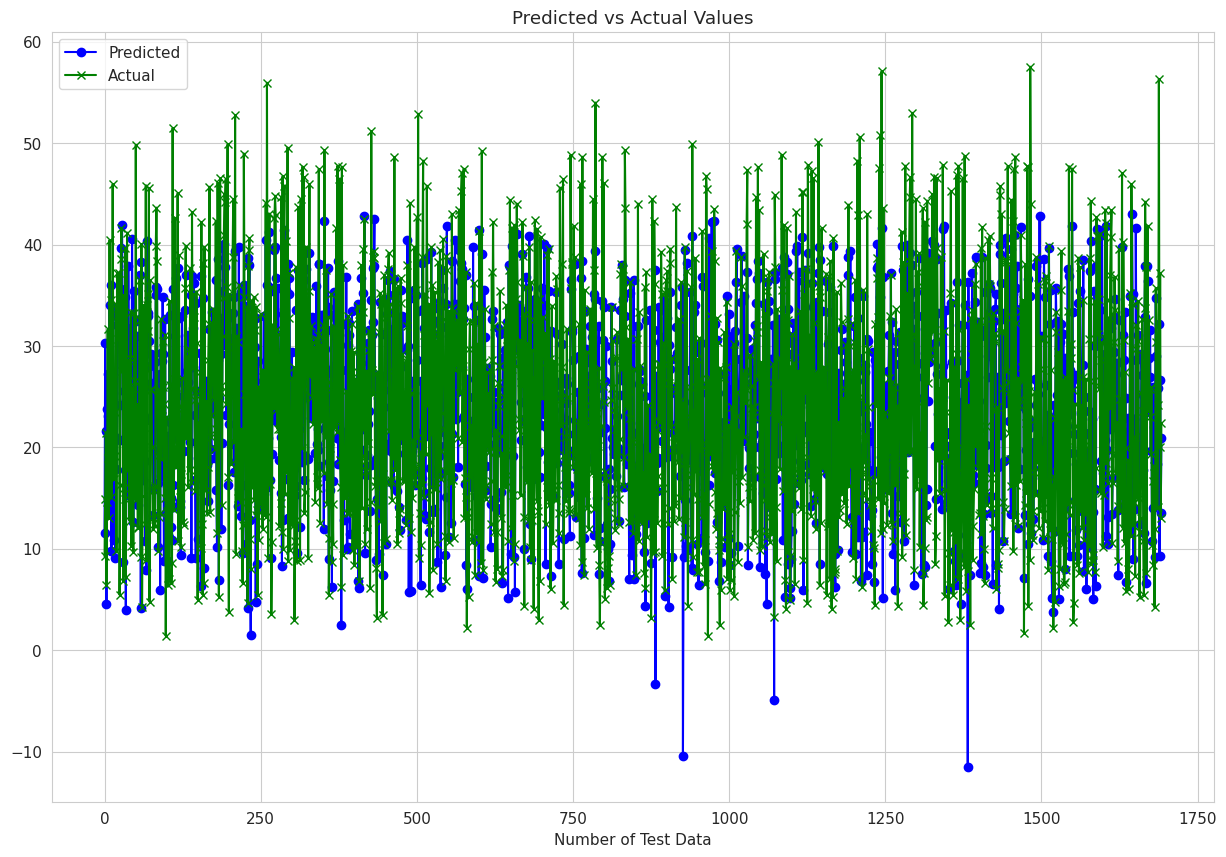

In [165]:
# Plotting predicted and actual values for the test data
plt.figure(figsize=(15,10))
plt.plot(y_test_pred, color='b', marker='o', label="Predicted")
plt.plot(np.array(Y_test), color='g', marker='x', label="Actual")
plt.legend()
plt.xlabel('Number of Test Data')
plt.title('Predicted vs Actual Values')
plt.show()

## **Lasso Regression**

In [166]:
# Creating a Lasso regression model with alpha value 0.01
lasso = Lasso(alpha=0.01)

# Fitting the Lasso model on the training data
lasso.fit(X_train, Y_train)

Lasso(alpha=0.01)

In [167]:
# Calculating the R-squared score on the training data
lasso_score = lasso.score(X_train, Y_train)
lasso_score

0.6165891753419741

In [168]:
# Predicting target values for the training and test data
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

**Training Set**

In [169]:
# Evaluating the Lasso model's performance on the training data
evaluation_score = evaluation(Y_train, y_train_pred)

In [170]:
# Printing evaluation metrics for the training data
print(f'MAE: {evaluation_score[0]}\nMSE: {evaluation_score[1]}\nRMSE: {evaluation_score[2]}\nR2: {evaluation_score[3]}\nAdjusted_R2 : {evaluation_score[4]}')

MAE: 5.633499376123986
MSE: 54.13939935420976
RMSE: 7.357948039651392
R2: 0.6165891753419741
Adjusted_R2 : 0.6143096817352083


In [171]:
# Creating a dictionary to store the training data evaluation results
dict_1 = {'Model': 'Lasso regression',
          'MAE': round((evaluation_score[0]), 3),
          'MSE': round((evaluation_score[1]), 3),
          'RMSE': round((evaluation_score[2]), 3),
          'R2_score': round((evaluation_score[3]), 3),
          'Adjusted R2': round((evaluation_score[4]), 2)}

# Appending the dictionary to the training_df DataFrame
training_df = training_df.append(dict_1, ignore_index=True)

**Testing Set**

In [172]:
# Evaluating the model on the test data
evaluation_score = evaluation(Y_test, y_test_pred)

In [173]:
# Printing evaluation metrics for the test data
print(f'MAE: {evaluation_score[0]}\nMSE: {evaluation_score[1]}\nRMSE: {evaluation_score[2]}\nR2: {evaluation_score[3]}\nAdjusted_R2 : {evaluation_score[4]}')

MAE: 5.665693877846221
MSE: 55.277644532405304
RMSE: 7.434893713591695
R2: 0.5992495363864552
Adjusted_R2 : 0.5968669533685387


In [174]:
# Creating a dictionary with Lasso regression evaluation metrics for testing data and appending it to the testing_df DataFrame
dict_2 = {'Model':'Lasso regression ',
       'MAE':round((evaluation_score[0]),3),
       'MSE':round((evaluation_score[1]),3),
       'RMSE':round((evaluation_score[2]),3),
       'R2_score':round((evaluation_score[3]),3),
       'Adjusted R2':round((evaluation_score[4]),2)}
testing_df=testing_df.append(dict_2, ignore_index=True)

## **Ridge Rigression**

In [175]:
# Creating a Ridge regression model with alpha=0.1 and fitting it to the training data
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, Y_train)

Ridge(alpha=0.1)

In [176]:
# Calculating the R-squared score for the Ridge regression model on the training data
ridge.score(X_train, Y_train)

0.6166007396579998

In [177]:
# Predicting the target variable using the Ridge regression model on both training and testing data
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

**Training Set**

In [178]:
# Calculating evaluation metrics for the training data
evaluation_score = evaluation(Y_train, y_train_pred)

In [179]:
# Printing evaluation metrics for the training data
print(f'MAE: {evaluation_score[0]}\nMSE: {evaluation_score[1]}\nRMSE: {evaluation_score[2]}\nR2: {evaluation_score[3]}\nAdjusted_R2 : {evaluation_score[4]}')

MAE: 5.633536717602092
MSE: 54.13776641876999
RMSE: 7.357837074763887
R2: 0.6166007396579998
Adjusted_R2 : 0.6143213148045991


In [180]:
# Storing data in a dictionary for the Ridge regression model on the training data
dict_1 = {'Model':'Ridge regression ',
       'MAE':round((evaluation_score[0]),3),
       'MSE':round((evaluation_score[1]),3),
       'RMSE':round((evaluation_score[2]),3),
       'R2_score':round((evaluation_score[3]),3),
       'Adjusted R2':round((evaluation_score[4]),2)}
training_df = training_df.append(dict_1, ignore_index=True)

**Testing Set**

In [181]:
# Calculating evaluation metrics for the Ridge regression model on the test data
evaluation_score = evaluation(Y_test, y_test_pred)

In [182]:
# Printing evaluation metrics for the test data
print(f'MAE: {evaluation_score[0]}\nMSE: {evaluation_score[1]}\nRMSE: {evaluation_score[2]}\nR2: {evaluation_score[3]}\nAdjusted_R2 : {evaluation_score[4]}')

MAE: 5.665126777595061
MSE: 55.28469626599739
RMSE: 7.435367930775006
R2: 0.5991984129073307
Adjusted_R2 : 0.5968155259448297


In [183]:
# Storing evaluation metrics for the Ridge regression model on the test data
dict_2 = {'Model':'Ridge regression ',
       'MAE':round((evaluation_score[0]),3),
       'MSE':round((evaluation_score[1]),3),
       'RMSE':round((evaluation_score[2]),3),
       'R2_score':round((evaluation_score[3]),3),
       'Adjusted R2':round((evaluation_score[4]),2)}

testing_df=testing_df.append(dict_2, ignore_index=True)

## **Decision Tree Regression**

In [184]:
# Import the DecisionTreeRegressor from scikit-learn
from sklearn.tree import DecisionTreeRegressor

In [185]:
# Create a DecisionTreeRegressor with the correct criterion parameter
tree = DecisionTreeRegressor(criterion='squared_error', max_depth=8, max_features=9, max_leaf_nodes=100)

# Fit the Decision Tree model to the training data
tree.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=8, max_features=9, max_leaf_nodes=100)

In [186]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

**Training Set**

In [187]:
evaluation_score = evaluation(Y_train,y_train_pred)

In [188]:
print(f'MAE: {evaluation_score[0]}\nMSE: {evaluation_score[1]}\nRMSE: {evaluation_score[2]}\nR2: {evaluation_score[3]}\nAdjusted_R2 : {evaluation_score[4]}')

MAE: 3.2822312953004524
MSE: 20.352963433537862
RMSE: 4.511425875877588
R2: 0.8558619676728901
Adjusted_R2 : 0.8550050233665458


In [189]:
#storing data
dict_1 = {'Model':'Decision Tree regression ',
       'MAE':round((evaluation_score[0]),3),
       'MSE':round((evaluation_score[1]),3),
       'RMSE':round((evaluation_score[2]),3),
       'R2_score':round((evaluation_score[3]),3),
       'Adjusted R2':round((evaluation_score[4]),2)}

training_df=training_df.append(dict_1, ignore_index=True)

**Testing Set**

In [190]:
evaluation_score = evaluation(Y_test,y_test_pred)

In [191]:
print(f'MAE: {evaluation_score[0]}\nMSE: {evaluation_score[1]}\nRMSE: {evaluation_score[2]}\nR2: {evaluation_score[3]}\nAdjusted_R2 : {evaluation_score[4]}')

MAE: 3.7176810533536613
MSE: 27.93808181634559
RMSE: 5.285648665617645
R2: 0.797455203905982
Adjusted_R2 : 0.7962510136795016


In [192]:
dict_2 = {'Model':'Decision Tree regression ',
       'MAE':round((evaluation_score[0]),3),
       'MSE':round((evaluation_score[1]),3),
       'RMSE':round((evaluation_score[2]),3),
       'R2_score':round((evaluation_score[3]),3),
       'Adjusted R2':round((evaluation_score[4]),2)}

testing_df=testing_df.append(dict_2, ignore_index=True)

Text(0, 0.5, 'Predicted')

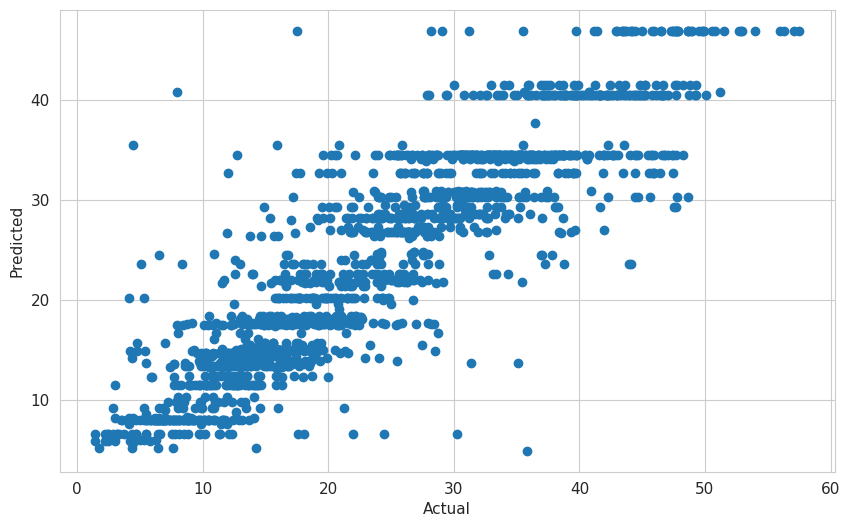

In [193]:
plt.scatter(Y_test, y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

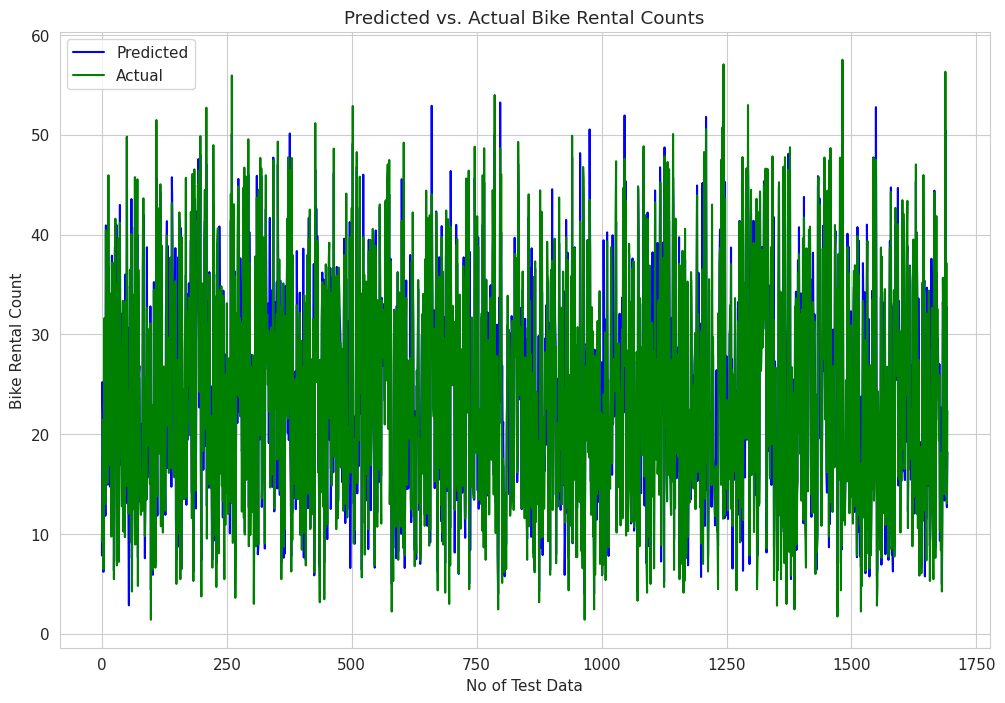

In [248]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the predicted and actual values with custom colors and labels
plt.plot(y_test_pred, color='blue', label="Predicted")
plt.plot(np.array(Y_test), color='green', label="Actual")

# Add a title and labels
plt.title("Predicted vs. Actual Bike Rental Counts")
plt.xlabel('No of Test Data')
plt.ylabel('Bike Rental Count')

# Add a legend
plt.legend()

# Display grid lines for better readability
plt.grid(True)

# Show the chart
plt.show()

In [195]:
tree.feature_importances_

array([0.38189353, 0.09296649, 0.16321608, 0.00120882, 0.0019886 ,
       0.01599991, 0.0339822 , 0.00278465, 0.30415762, 0.00180209])

In [196]:
features = X.columns
importances = tree.feature_importances_
indices = np.argsort(importances)

In [197]:
indices

array([3, 9, 4, 7, 5, 6, 1, 2, 8, 0])

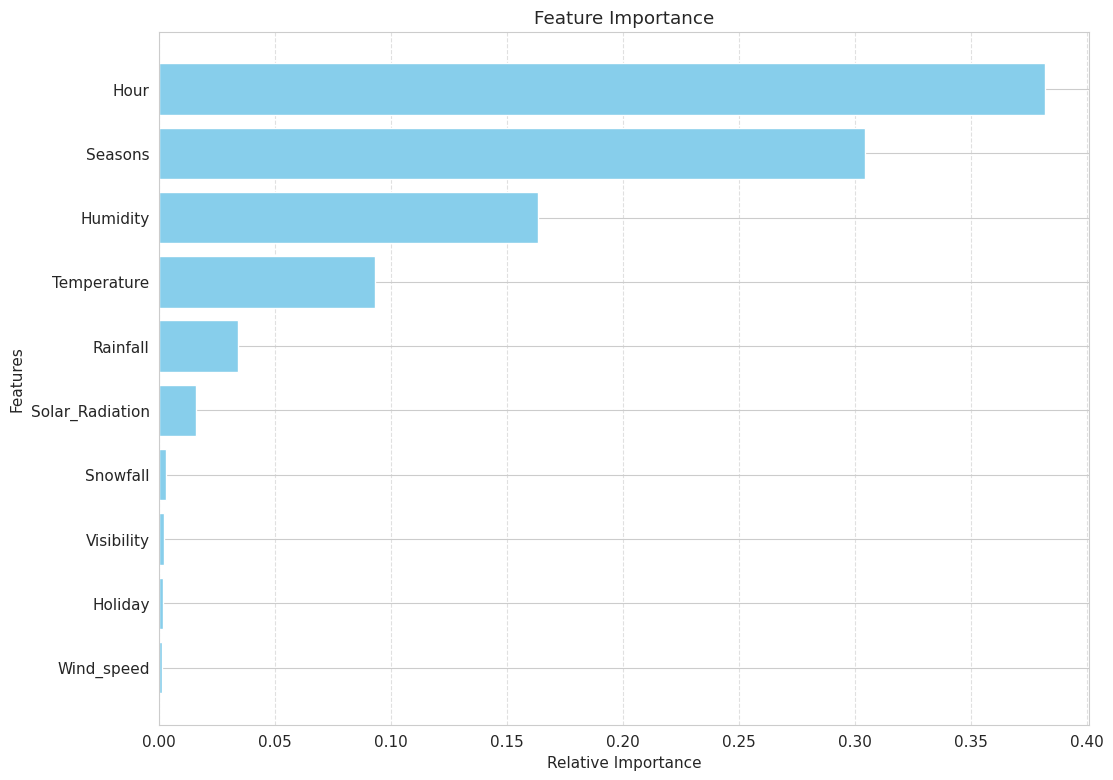

In [249]:
# Set the figure size
plt.figure(figsize=(12, 9))

# Set the chart title
plt.title('Feature Importance')

# Create a horizontal bar chart
plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')

# Set y-tick labels to feature names
plt.yticks(range(len(indices)), [features[i] for i in indices])

# Set labels for the x and y axes
plt.xlabel('Relative Importance')
plt.ylabel('Features')

# Display the chart with grid lines
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

# Show the chart
plt.show()

## **RandomForest Algorithm**

In [199]:
from sklearn.ensemble import RandomForestRegressor

In [200]:
random_forest = RandomForestRegressor(n_estimators=200,max_depth=6)
random_forest.fit(X_train,Y_train)

RandomForestRegressor(max_depth=6, n_estimators=200)

In [201]:
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

**Training Set**

In [202]:
evaluation_score = evaluation(Y_train,y_train_pred)

In [203]:
print(f'MAE: {evaluation_score[0]}\nMSE: {evaluation_score[1]}\nRMSE: {evaluation_score[2]}\nR2: {evaluation_score[3]}\nAdjusted_R2 : {evaluation_score[4]}')

MAE: 3.333477845621578
MSE: 21.36346197254815
RMSE: 4.6220625236519846
R2: 0.8487056991738098
Adjusted_R2 : 0.8478062086813829


In [204]:
#storing data
dict_1 = {'Model':'Random Forest regression ',
       'MAE':round((evaluation_score[0]),3),
       'MSE':round((evaluation_score[1]),3),
       'RMSE':round((evaluation_score[2]),3),
       'R2_score':round((evaluation_score[3]),3),
       'Adjusted R2':round((evaluation_score[4]),2)}

training_df=training_df.append(dict_1, ignore_index=True)

**Testing Set**

In [205]:
evaluation_score = evaluation(Y_test,y_test_pred)

In [206]:
print(f'MAE: {evaluation_score[0]}\nMSE: {evaluation_score[1]}\nRMSE: {evaluation_score[2]}\nR2: {evaluation_score[3]}\nAdjusted_R2 : {evaluation_score[4]}')

MAE: 3.762301581768609
MSE: 28.04746337625909
RMSE: 5.295985590639299
R2: 0.7966622122505504
Adjusted_R2 : 0.7954533074482351


In [207]:
dict_2 = {'Model':'Random Forest regression ',
       'MAE':round((evaluation_score[0]),3),
       'MSE':round((evaluation_score[1]),3),
       'RMSE':round((evaluation_score[2]),3),
       'R2_score':round((evaluation_score[3]),3),
       'Adjusted R2':round((evaluation_score[4]),2)}

testing_df=testing_df.append(dict_2, ignore_index=True)

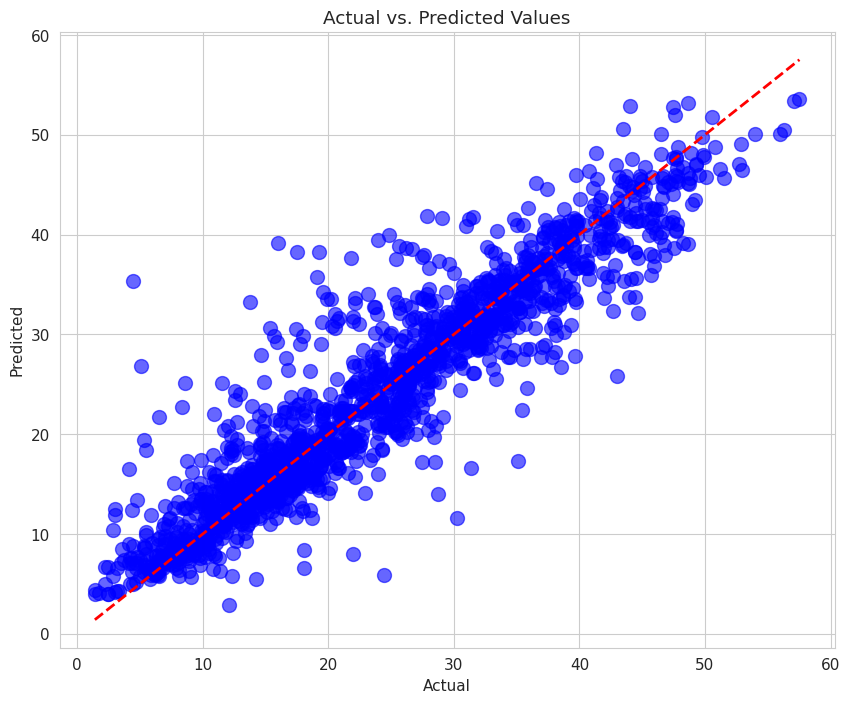

In [252]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Create a scatter plot of actual vs. predicted values
plt.scatter(Y_test, y_test_pred, color='blue', alpha=0.6, s=100)

# Set labels for the x and y axes
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Add a reference line for y=x
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', linewidth=2)

# Set a title for the chart
plt.title('Actual vs. Predicted Values')

# Show the chart
plt.show()

## **GradientBoosting Algorithm**

In [209]:
from sklearn.ensemble import GradientBoostingRegressor

In [210]:
GBM = GradientBoostingRegressor()
GBM.fit(X_train,Y_train)

GradientBoostingRegressor()

In [211]:
y_train_pred = GBM.predict(X_train)
y_test_pred = GBM.predict(X_test)

**Training Set**

In [212]:
evaluation_score = evaluation(Y_train,y_train_pred)

In [213]:
print(f'MAE: {evaluation_score[0]}\nMSE: {evaluation_score[1]}\nRMSE: {evaluation_score[2]}\nR2: {evaluation_score[3]}\nAdjusted_R2 : {evaluation_score[4]}')

MAE: 2.9024394730702276
MSE: 16.316183248338056
RMSE: 4.03932955431196
R2: 0.8844501167516126
Adjusted_R2 : 0.8837631376597672


In [214]:
#storing data
dict_1 = {'Model':'Gradient Boosting regression ',
       'MAE':round((evaluation_score[0]),3),
       'MSE':round((evaluation_score[1]),3),
       'RMSE':round((evaluation_score[2]),3),
       'R2_score':round((evaluation_score[3]),3),
       'Adjusted R2':round((evaluation_score[4]),2)}

training_df=training_df.append(dict_1, ignore_index=True)

**Testing Set**

In [215]:
evaluation_score = evaluation(Y_test,y_test_pred)

In [216]:
print(f'MAE: {evaluation_score[0]}\nMSE: {evaluation_score[1]}\nRMSE: {evaluation_score[2]}\nR2: {evaluation_score[3]}\nAdjusted_R2 : {evaluation_score[4]}')

MAE: 3.2806248784902095
MSE: 21.4593198043491
RMSE: 4.632420512469599
R2: 0.8444247682192254
Adjusted_R2 : 0.8434998262942506


In [217]:
dict_2 = {'Model':'Gradient Boosting regression ',
       'MAE':round((evaluation_score[0]),3),
       'MSE':round((evaluation_score[1]),3),
       'RMSE':round((evaluation_score[2]),3),
       'R2_score':round((evaluation_score[3]),3),
       'Adjusted R2':round((evaluation_score[4]),2)}

testing_df=testing_df.append(dict_2, ignore_index=True)

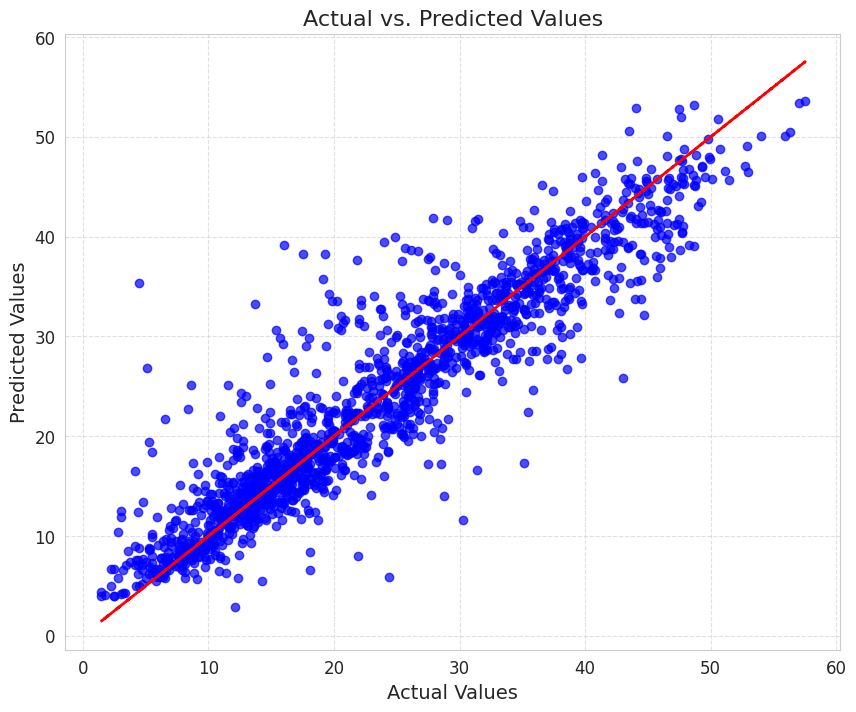

In [253]:
# Set the figure size and add labels
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, y_test_pred, alpha=0.7, color='b')
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

# Add a diagonal line for reference
plt.plot(Y_test, Y_test, color='r', linestyle='--', linewidth=2)

# Customize grid and tick appearance
plt.grid(True, linestyle='--', alpha=0.6)
plt.tick_params(axis='both', which='major', labelsize=12)

# Show the chart
plt.show()

## **Grid Search CV on Gradient Boosting Regressor**

In [219]:
from sklearn.model_selection import GridSearchCV

In [220]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [221]:
gb_model = GradientBoostingRegressor()
gb_grid = GridSearchCV(estimator=gb_model, param_grid = param_dict, cv=5, verbose=2)
gb_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.1s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [222]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [223]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [224]:
gb_grid_model = gb_grid.best_estimator_

In [225]:
y_train_pred = gb_grid_model.predict(X_train)
y_test_pred = gb_grid_model.predict(X_test)

**Training Set**

In [226]:
evaluation_score = evaluation(Y_train,y_train_pred)

In [227]:
print(f'MAE: {evaluation_score[0]}\nMSE: {evaluation_score[1]}\nRMSE: {evaluation_score[2]}\nR2: {evaluation_score[3]}\nAdjusted_R2 : {evaluation_score[4]}')

MAE: 2.1269039446902647
MSE: 9.206723529175685
RMSE: 3.034258316158281
R2: 0.9347987324790071
Adjusted_R2 : 0.9344110911738883


In [228]:
#storing data
dict_1 = {'Model':'GridSearch CV on Gradient Boosting regression ',
       'MAE':round((evaluation_score[0]),3),
       'MSE':round((evaluation_score[1]),3),
       'RMSE':round((evaluation_score[2]),3),
       'R2_score':round((evaluation_score[3]),3),
       'Adjusted R2':round((evaluation_score[4]),2)}

training_df=training_df.append(dict_1, ignore_index=True)

**Testing Set**

In [229]:
evaluation_score = evaluation(Y_test,y_test_pred)

In [230]:
print(f'MAE: {evaluation_score[0]}\nMSE: {evaluation_score[1]}\nRMSE: {evaluation_score[2]}\nR2: {evaluation_score[3]}\nAdjusted_R2 : {evaluation_score[4]}')

MAE: 2.8860372591397376
MSE: 17.90342986730608
RMSE: 4.231244482100518
R2: 0.8702041687867249
Adjusted_R2 : 0.8694324932147078


In [231]:
dict_2 = {'Model':'GridSearch CV on Gradient Boosting regression ',
       'MAE':round((evaluation_score[0]),3),
       'MSE':round((evaluation_score[1]),3),
       'RMSE':round((evaluation_score[2]),3),
       'R2_score':round((evaluation_score[3]),3),
       'Adjusted R2':round((evaluation_score[4]),2)}

testing_df=testing_df.append(dict_2, ignore_index=True)

## **XGBoost**

In [232]:
import xgboost as xgb

In [233]:
XGB = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.01)

In [234]:
XGB.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [235]:
y_test_pred = XGB.predict(X_test)
y_train_pred = XGB.predict(X_train)

**Training Set**

In [236]:
XGB.score(X_train,Y_train)

0.9394988940301312

In [237]:
evaluation_score = evaluation(Y_train,y_train_pred)

In [238]:
print(f'MAE: {evaluation_score[0]}\nMSE: {evaluation_score[1]}\nRMSE: {evaluation_score[2]}\nR2: {evaluation_score[3]}\nAdjusted_R2 : {evaluation_score[4]}')

MAE: 2.0563086994168636
MSE: 8.543038763695813
RMSE: 2.922847714763089
R2: 0.9394988940301312
Adjusted_R2 : 0.939139196610572


In [239]:
#storing data
dict_1 = {'Model':'XGB regression ',
       'MAE':round((evaluation_score[0]),3),
       'MSE':round((evaluation_score[1]),3),
       'RMSE':round((evaluation_score[2]),3),
       'R2_score':round((evaluation_score[3]),3),
       'Adjusted R2':round((evaluation_score[4]),2)}

training_df=training_df.append(dict_1, ignore_index=True)

**Testing Set**

In [240]:
XGB.score(X_test,Y_test)

0.868928200695902

In [241]:
evaluation_score = evaluation(Y_test,y_test_pred)

In [242]:
print(f'MAE: {evaluation_score[0]}\nMSE: {evaluation_score[1]}\nRMSE: {evaluation_score[2]}\nR2: {evaluation_score[3]}\nAdjusted_R2 : {evaluation_score[4]}')

MAE: 2.8717958553504808
MSE: 18.079430937705887
RMSE: 4.251991408470375
R2: 0.868928200695902
Adjusted_R2 : 0.8681489391066981


In [243]:
#storing data
dict_2 = {'Model':'XGB regression ',
       'MAE':round((evaluation_score[0]),3),
       'MSE':round((evaluation_score[1]),3),
       'RMSE':round((evaluation_score[2]),3),
       'R2_score':round((evaluation_score[3]),3),
       'Adjusted R2':round((evaluation_score[4]),2)}

testing_df=testing_df.append(dict_2, ignore_index=True)

## **Conclusion**

In [244]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,testing_df],keys=['Training set','Testing set'])
result.style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#7CAE00'),
            ('color', 'white'),
            ('font-family', 'verdana')]},

 {'selector': 'td',
  'props': [('font-family', 'verdana')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#DCDCDC')]},

 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},

 {'selector': 'tr:hover',
  'props': [('background-color', 'yellow')]}

]
)

In [245]:
r2_score = result.R2_score.to_list()
model = result.Model.to_list()
training_testing = ['Training'] * 8 + ['Testing'] * 8

In [246]:
conclusion_df = pd.DataFrame({'model' : model,'r2_score' : r2_score,'training_testing_set' :training_testing})

In [254]:
import plotly.express as px

# Create a Plotly bar chart
fig = px.bar(conclusion_df, y='model', x='r2_score', color='training_testing_set',
             barmode='group', text='r2_score', title='Model Comparison')

# Customize the aesthetics
fig.update_traces(marker_color='lightblue', textposition='outside')
fig.update_xaxes(title='R-squared (R2) Score', showgrid=True, gridwidth=0.5, gridcolor='lightgray')
fig.update_yaxes(title='Model', showgrid=False)
fig.update_layout(title_text='Model Comparison', title_x=0.5, title_font_size=24)

# Show the chart
fig.show()

**Key Observations:**

1. **Linear regression**, **Lasso regression**, and **Ridge regression** exhibit similar R2 scores, indicating a comparable level of performance.

2. Models such as **XGB regression**, **Gradient Boosting regression**, **Decision Tree regression**, and **GridSearch CV on Gradient Boosting regression** achieve an **R2 score of 80% or higher** on the testing set.

3. Notably, **XGB regression** and **Gradient Boosting regression** stand out as **top-performing models** in this analysis.